# Projet de mi-session SIO-6003
<h5>Date : Du 5 juin au 15 juin (10jours)</h5>

### Contexte 

Dans un environnement commercial en ligne, ***comprendre et prédire le comportement des clients est essentiel pour optimiser les stratégies de vente et de marketing***. Une bonne estimation de la valeur d'achat d'un client permet d'affiner les décisions stratégiques, d'améliorer l'affectation des ressources et de maximiser la rentabilité. Dans ce projet, nous cherchons à développer un modèle d’estimation de la valeur d'achat d'un client en fonction de plusieurs variables explicatives. Pour cela, un jeu de données fictif contenant **2000** observations a été généré. Il comprend des informations sur les clients d'une entreprise de e-commerce proposant divers produits et services en ligne.
***Votre mission est d'explorer ces données afin de répondre à plusieurs questions telles que : Quels sont les principaux facteurs influençant la valeur d'achat ? L'entreprise devrait-elle concentrer ses efforts marketing sur l'augmentation de la fréquence d'achat ou sur l'incitation à adhérer au programme « **Premium** » ? Autant de questions auxquelles une analyse rigoureuse des données peut apporter des réponses.***

### Consignes 

Vous devez remettre un rapport clair et concis répondant aux questions de la section « Travail demandé ». Le rapport ne doit pas contenir de code (R, Python, Excel, etc.). Ce dernier devra être soumis séparément pour fins de vérification, mais ne sera pas corrigé. Veuillez noter qu'il est interdit d’utiliser un outil d’intelligence artificielle (IA) dans le cadre de cette évaluation.
Les documents à déposer dans la boîte de dépôt sont :
1.	La version pdf de votre rapport (seul ce rapport obligatoire sera corrigé).
2.	Les codes sources ou fichiers d’analyse (R, R Markdown, Python, Python Markdown, Excel, etc.). 

- **NB** : Ces fichiers ne seront pas corrigés et seront utilisés pour fins de consultation seulement.

### Description du jeu de données

Le jeu « Projet-Mi-session-DataSet » contient **2000** enregistrements et **14** variables définies par :

1.	ID : Identifiant du client.
2.	Age : Âge du client.
3.	TypeClient : Client régulier ou premium.
4.	ModePayement : Mode de paiement (Carte, PayPal, Virement).
5.	NbAchats : Nombre d'achats depuis la création du compte client.
6.	Revenu : Revenu mensuel du client en dollars.
7.	TempsSite : Temps moyen passé sur le site en minutes par mois.
8.	Réduction : Pourcentage moyen de réduction appliquée.
9.	PanierMoyen : Valeur moyenne du panier.
10.	TotalAchats : Valeur totale de l'achat depuis la création du compte client.
11.	AppelSerClient : Nombre d’appels au service à la clientèle.
12.	NbVisites : Nombre de visites effectuées par un client sur le site lors du dernier trimestre.
13.	ValeurAchat : Valeur totale d’achat par an.
14.	NbRetours : ombre de fois que le client a retourné un article après achat.


# Travail demandé

#### Importer les librairies et le jeu de données

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [92]:
# Importer les données
df = pd.read_excel('Projet-Mi-session-DataSet.xlsx', sheet_name='Feuil1', index_col=0)   

In [93]:
df.head()

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
1,47,Régulier,Virement,30,4180.13,13.70,23.31,112.52,463.08,3,7.42,296.70,2
2,31,Premium,Carte,38,3996.57,10.37,12.11,125.58,542.33,7,7.92,316.77,5
3,39,Régulier,PayPal,15,2228.23,14.64,23.31,139.70,581.82,9,9.78,271.29,0
4,43,Régulier,Carte,6,4053.89,23.95,4.99,95.85,377.39,11,9.22,208.64,0
5,36,Premium,Virement,27,NaN,8.33,18.79,110.71,443.85,7,7.48,259.01,3


In [94]:
df.tail()

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
1996,35,Régulier,PayPal,20,3387.37,7.13,5.99,82.39,326.57,9,9.63,225.31,2
1997,61,Régulier,PayPal,6,1577.03,17.59,11.49,122.26,475.06,9,6.84,193.70,3
1998,46,Régulier,Virement,36,3742.46,16.59,26.80,103.43,384.70,3,8.05,281.97,3
1999,22,Régulier,PayPal,24,3486.04,7.73,24.51,96.10,386.38,9,8.78,231.07,0
2000,35,Régulier,Carte,1,2522.59,6.10,27.83,85.65,302.59,16,7.80,191.99,1


In [95]:
df.sample(5)

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
1307,43,Régulier,Carte,11,2667.14,5.12,15.42,147.83,628.33,-2,8.38,335.14,2
1362,36,Régulier,Virement,25,2876.27,9.39,11.64,112.40,411.61,14,7.46,218.42,3
437,43,Régulier,Carte,19,3428.32,9.27,20.61,94.54,392.16,11,8.01,240.59,3
1416,48,Régulier,PayPal,30,3899.89,8.34,3.84,110.91,445.63,6,6.01,280.39,3
851,60,Régulier,Carte,2,2964.99,13.04,28.68,105.88,466.53,19,1.80,111.97,2


### 1.	Présentez une analyse descriptive globale accompagnée de graphiques et tableaux pertinents. Résumez les principaux constats. (3 pts)

##### Identifions le type des variables statistiques

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2000 non-null   int64  
 1   TypeClient      2000 non-null   object 
 2   ModePayement    2000 non-null   object 
 3   NbAchats        2000 non-null   int64  
 4   Revenu          1999 non-null   float64
 5   TempsSite       2000 non-null   float64
 6   Réduction       2000 non-null   float64
 7   PanierMoyen     2000 non-null   float64
 8   TotalAchats     2000 non-null   float64
 9   AppelSerClient  2000 non-null   int64  
 10  NbVisites       2000 non-null   float64
 11  ValeurAchat     2000 non-null   float64
 12  NbRetours       2000 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 218.8+ KB


| Variable           | Type statistique      | Détails                              |
| ------------------ | --------------------- | ------------------------------------ |
| **Age**            | **Quantitative** discrète | Âge entier                   |
| **TypeClient**     | **Qualitative** nominale  | Deux catégories : régulier / premium |
| **ModePayement**   | **Qualitative** nominale  | Carte, PayPal, Virement   |
| **NbAchats**       | **Quantitative** discrète | Nombre d’achats              |
| **Revenu**         | **Quantitative** continue | Revenu mensuel (valeur mesurée)      |
| **TempsSite**      | **Quantitative** continue | Temps passé sur le site              |
| **Réduction**      | **Quantitative** continue | Pourcentage                          |
| **PanierMoyen**    | **Quantitative** continue | Valeur moyenne des paniers           |
| **TotalAchats**    | **Quantitative** continue | Valeur cumulée des achats            |
| **AppelSerClient** | **Quantitative** discrète | Nombre d’appels              |
| **NbVisites**      | **Quantitative** discrète | Nombre de visites sur le site        |
| **ValeurAchat**    | **Quantitative** continue | Valeur d’achat annuelle              |
| **NbRetours**      | **Quantitative** discrète | Nombre de retours                    |


In [97]:
df_quantitative = df.select_dtypes(include=['int64', 'float64'])
df_qualitative = df.select_dtypes(include=['object'])

##### Analyse des variables quantitatives

In [98]:
# Créer une copie de la table describe
extended_stats = df_quantitative.describe().T

# Calculer les statistiques supplémentaires
extended_stats["mode"] = df_quantitative.mode().iloc[0]
extended_stats["etendue"] = df_quantitative.max() - df_quantitative.min()
extended_stats["IQR"] = df_quantitative.quantile(0.75) - df_quantitative.quantile(0.25)
extended_stats["asymetrie"] = df_quantitative.skew()
extended_stats["applatissement"] = df_quantitative.kurtosis()

In [99]:
extended_stats

,count,mean,std,min,25%,50%,75%,max,mode,etendue,IQR,asymetrie,applatissement
Age,2000.0,42.893000,13.364724,20.00,32.0000,43.000,54.0000,66.00,48.00,46.00,22.0000,-0.024952,-1.160480
NbAchats,2000.0,25.272500,14.107401,1.00,13.0000,25.000,37.0000,49.00,17.00,48.00,24.0000,-0.005079,-1.177156
Revenu,1999.0,2991.873632,1029.690896,227.63,2271.8250,2991.890,3695.3000,5598.07,1457.20,5370.44,1423.4750,-0.055107,-0.275969
TempsSite,2000.0,12.117495,4.623579,2.93,8.6575,11.535,14.8825,24.18,10.09,21.25,6.2250,0.512067,-0.277613
Réduction,2000.0,15.008550,8.519735,0.00,7.7375,15.030,22.2500,29.99,0.96,29.99,14.5125,-0.006646,-1.156990
PanierMoyen,2000.0,99.971005,19.549363,47.17,86.4750,99.560,113.1975,180.54,79.76,133.37,26.7225,0.049621,-0.201034
TotalAchats,2000.0,398.263125,85.954664,167.59,340.4525,398.915,456.5125,629.61,242.26,462.02,116.0600,0.014454,-0.241490
AppelSerClient,2000.0,8.825500,4.739544,-14.00,6.0000,9.000,12.0000,24.00,8.00,38.00,6.0000,0.033144,0.058287
NbVisites,2000.0,7.865355,2.437115,1.05,6.1000,7.920,9.6725,14.56,9.94,13.51,3.5725,-0.049913,-0.614283
ValeurAchat,2000.0,233.797440,57.532379,80.02,195.2875,235.335,272.1925,610.55,201.57,530.53,76.9050,0.021332,0.545316


##### Analyse des variables qualitatives

In [100]:
df_qualitative.describe()

,TypeClient,ModePayement
count,2000,2000
unique,2,3
top,Premium,Virement
freq,1017,684


In [101]:
Tabl_freq_TypeClient = pd.DataFrame()
Tabl_freq_TypeClient['Fréquence'] = df_qualitative['TypeClient'].value_counts()
Tabl_freq_TypeClient['Fréquence relative'] = df_qualitative['TypeClient'].value_counts(normalize=True)
Tabl_freq_TypeClient

,Fréquence,Fréquence relative
TypeClient,,
Premium,1017,0.5085
Régulier,983,0.4915


In [102]:
Tabl_freq_ModePayement = pd.DataFrame()
Tabl_freq_ModePayement['Fréquence'] = df_qualitative['ModePayement'].value_counts()
Tabl_freq_ModePayement['Fréquence relative'] = df_qualitative['ModePayement'].value_counts(normalize=True)
Tabl_freq_ModePayement

,Fréquence,Fréquence relative
ModePayement,,
Virement,684,0.342
Carte,660,0.330
PayPal,656,0.328


##### Visualisation (Graphique)

 Variable quantitative

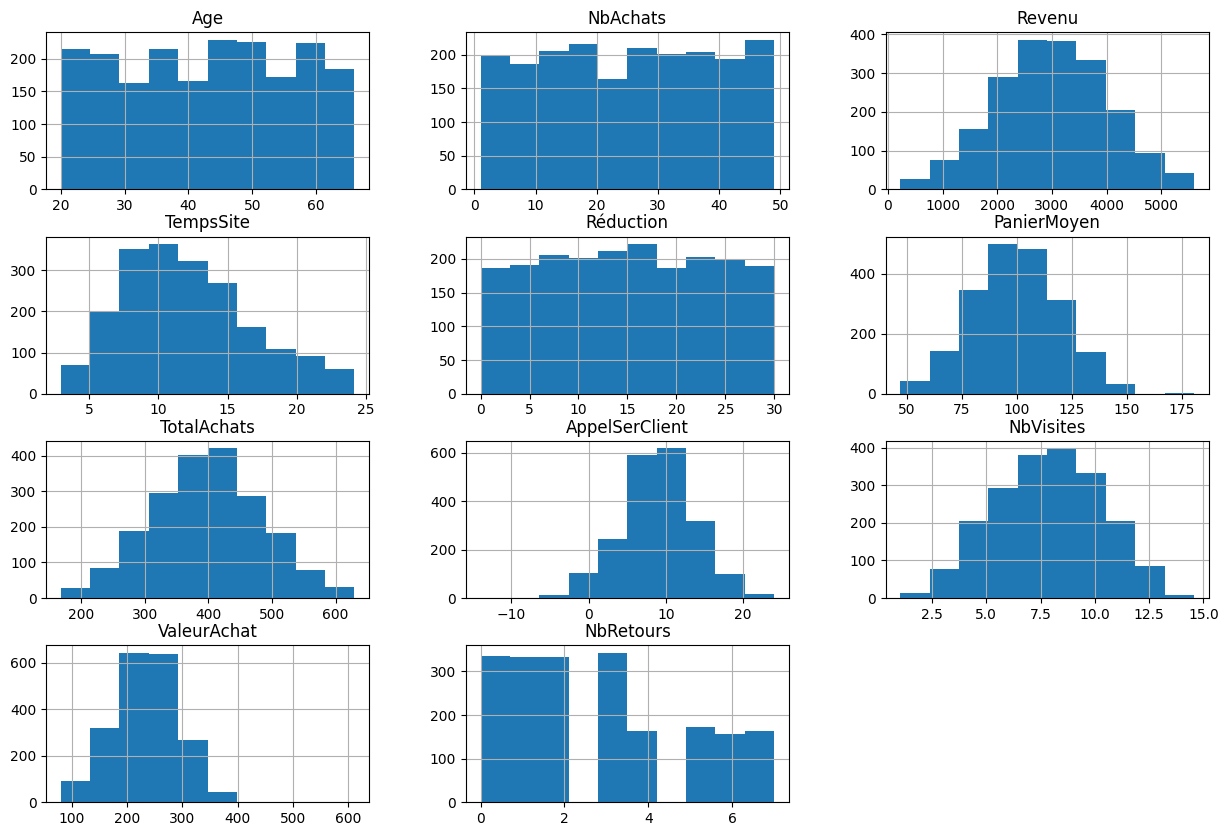

In [103]:
df.hist(figsize=(15, 10));

Variables qualitatives

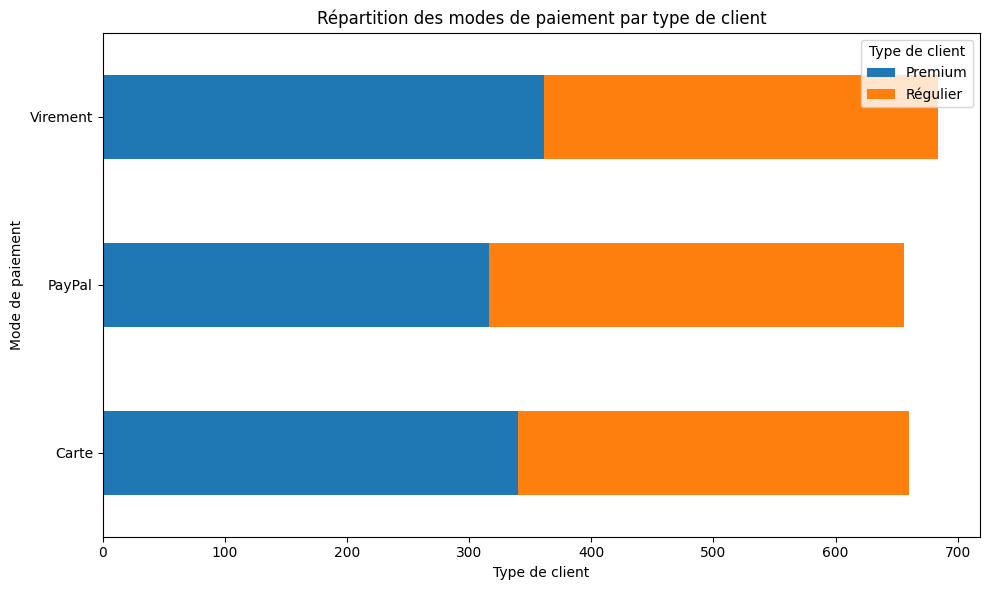

In [104]:
table = pd.crosstab(df_qualitative['ModePayement'], df_qualitative['TypeClient'])
table.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Répartition des modes de paiement par type de client')
plt.xlabel("Type de client")
plt.ylabel("Mode de paiement")
plt.legend(title="Type de client")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Répartition des types de clients et modes de paiement')

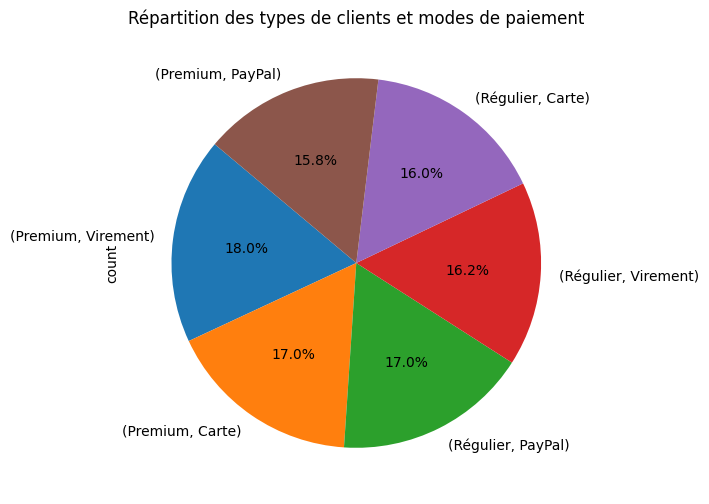

In [105]:
df[['TypeClient','ModePayement']].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140)
plt.title('Répartition des types de clients et modes de paiement')

<Axes: ylabel='count'>

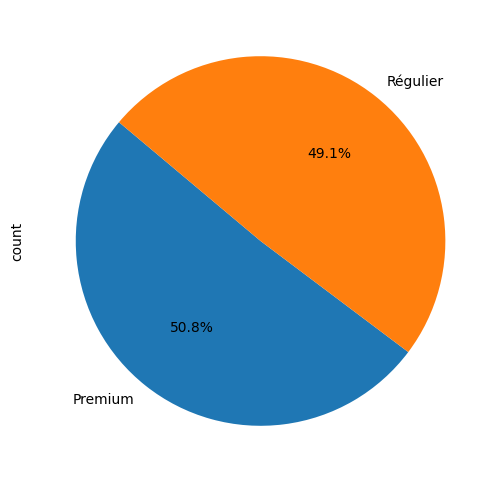

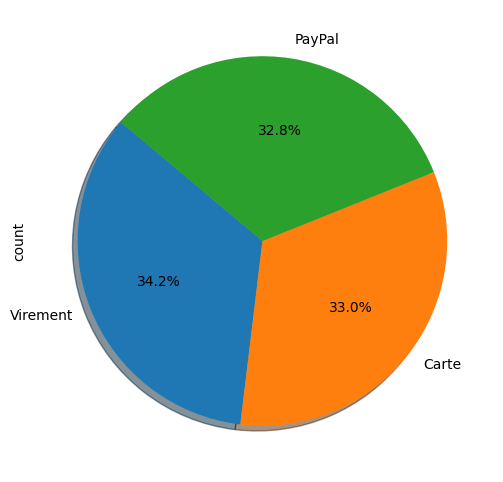

In [106]:
plt.figure(figsize=(6, 6))
df['TypeClient'].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140 )
plt.figure(figsize=(6, 6))
df['ModePayement'].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140, shadow=True)

### 2.	Donnez les boîtes à moustaches des variables « Revenu », « PanierMoyen » et « ValeurAchat ». Quelles conclusions en tirez-vous ?	(2 points)

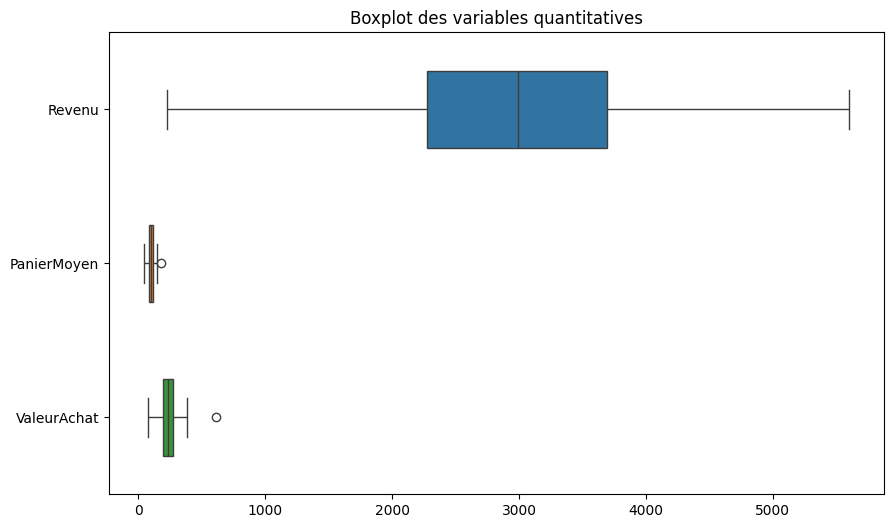

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_quantitative[['Revenu','PanierMoyen', 'ValeurAchat']], orient='h', width=0.5)
plt.title('Boxplot des variables quantitatives');

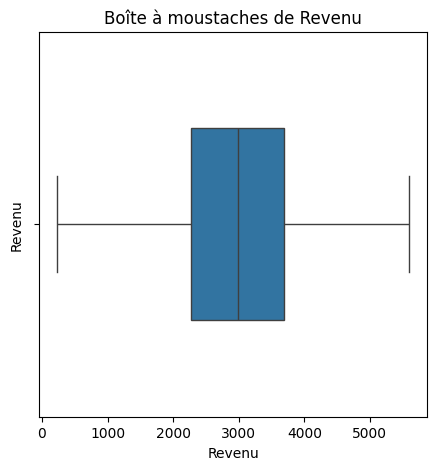

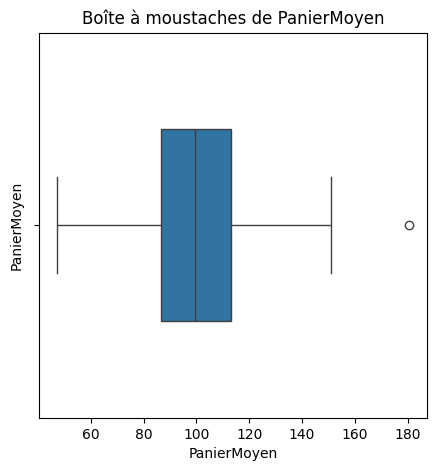

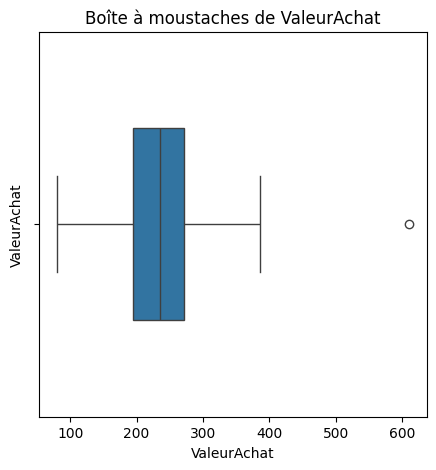

In [108]:
boite_À_moustaches = ['Revenu','PanierMoyen','ValeurAchat']
for col in boite_À_moustaches:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df[col], orient='h', width=0.5)
    plt.title(f'Boîte à moustaches de {col}')
    plt.ylabel(col)
    plt.show()
    

### 3.	Réalisez le test statistique qui permet de comparer la moyenne des revenus entre les clients réguliers et les clients premiums. Les résultats du test indiquent-ils une différence significative ? Justifiez votre réponse.	(2 points)

In [109]:
from scipy import stats

# Séparation des groupes
revenu_reg = df[df['TypeClient'] == 'Régulier']['Revenu'].dropna()
revenu_prem = df[df['TypeClient'] == 'Premium']['Revenu'].dropna()

In [110]:
print(f"Revenu des clients Premium : {revenu_prem.mean():.3f} ,Revenue des clients régulier : {revenu_reg.mean():.3f}") 

Revenu des clients Premium : 3054.034 ,Revenue des clients régulier : 2927.626


In [111]:
# Tester l'égalité des variances
levene_stat, levene_p = stats.levene(revenu_reg, revenu_prem)
print(f"Levene's test: stat={levene_stat:.3f}, p-value={levene_p:.7f}")

# Si p_levene < 0.05, les variances sont significativement différentes ==> equal_var=False

Levene's test: stat=17.127, p-value=0.0000364


In [112]:
# Test t pour échantillons indépendants
t_stat, p_value = stats.ttest_ind(revenu_reg, revenu_prem, equal_var=False)  
print(f"T-statistique : {t_stat:.3f}, p-value : {p_value:.4f}")

T-statistique : -2.744, p-value : 0.0061


### 4.	La variable "Revenu" comporte une valeur manquante. Quelle stratégie adopteriez-vous pour y remédier ? Expliquez votre choix.	(1 point)

In [113]:
df[df["Revenu"].isna()]

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
5,36,Premium,Virement,27,NaN,8.33,18.79,110.71,443.85,7,7.48,259.01,3


In [114]:
Revenu_median = df["Revenu"].median()
df["Revenu"].fillna(Revenu_median, inplace=True);
df[df["Revenu"].isna()]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24256\1623096605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Revenu"].fillna(Revenu_median, inplace=True);


,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,


### 5.	Générez un diagramme à barres égales empilées pour la variable « NbRetours », en distinguant les types de clients (régulier ou premium), puis interprétez les résultats.	(2 points)

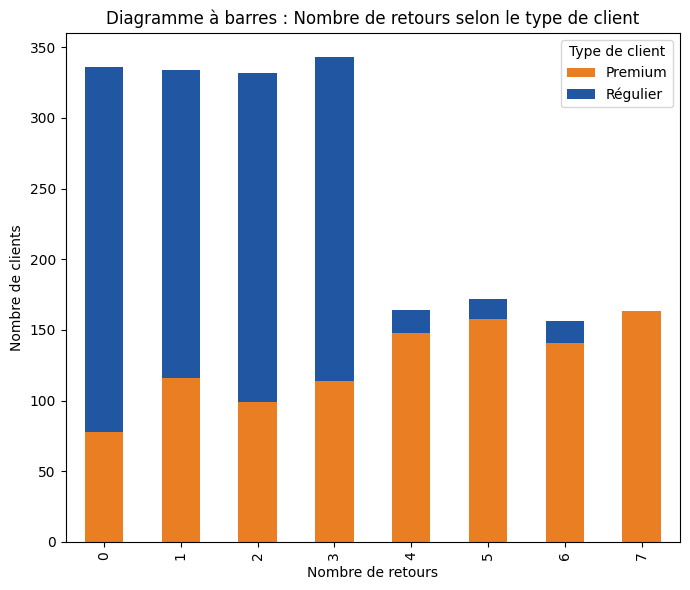

In [115]:
# Création d'une table de contingence pour obtenir les effectifs
retour_counts = pd.crosstab(df['NbRetours'], df['TypeClient'])

# Création du diagramme à barres (non normalisées)
retour_counts.plot(kind='bar', stacked=True, figsize=(7, 6), color=["#E97F22", "#2157A2"])

plt.title("Diagramme à barres : Nombre de retours selon le type de client")
plt.xlabel("Nombre de retours")
plt.ylabel("Nombre de clients")
plt.legend(title="Type de client", loc='upper right')
plt.tight_layout()
plt.show()


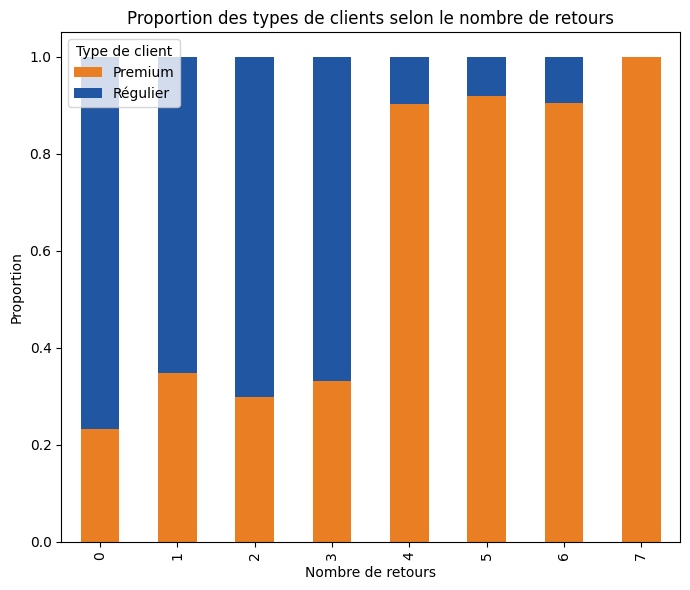

In [116]:
# Création du graphique à barres égales empilées
retour_counts_normalized = pd.crosstab(df['NbRetours'], df['TypeClient'], normalize='index')

retour_counts_normalized.plot(kind='bar', stacked=True, color=["#E97F22", "#2157A2"], figsize=(7, 6))
plt.title('Proportion des types de clients selon le nombre de retours')
plt.xlabel('Nombre de retours')
plt.ylabel('Proportion')
plt.legend(title='Type de client')
plt.tight_layout()
plt.show()

### 6.	Effectuez un test statistique pour vérifier si la moyenne du panier moyen est significativement différente de 100 $, en utilisant un niveau de signification de 0,01.	(1 point)

In [117]:
# Importer les données pour le test t de Student
panier_moyen = df["PanierMoyen"].dropna()

# Test t de Student pour une moyenne (valeur hypothétique = 100)
t_stat, p_value = stats.ttest_1samp(panier_moyen, popmean=100)

# Moyenne observée et taille de l'échantillon
mean_value = panier_moyen.mean()
sample_size = len(panier_moyen)

t_stat, p_value, mean_value, sample_size

(np.float64(-0.06632931382510489),
 np.float64(0.9471222783465254),
 np.float64(99.971005),
 2000)

### 7.	Déterminez l’intervalle de confiance à 95% pour la proportion π des clients de la catégorie « Premium » parmi l'ensemble de la population des clients de l'entreprise.           	(1 point)

In [118]:
from scipy.stats import norm
# Taille de l'échantillon
n = len(df)

# Proportion de clients "Premium"
p_hat = (df["TypeClient"] == "Premium").mean()

# Valeur critique z pour un niveau de confiance de 95%
z = norm.ppf(0.975)

# Calcul de la marge d'erreur
margin_error = z * ((p_hat * (1 - p_hat)) / n) ** 0.5

# Intervalle de confiance
lower_bound = p_hat - margin_error
upper_bound = p_hat + margin_error

(p_hat, lower_bound, upper_bound)

(np.float64(0.5085),
 np.float64(0.4865901031520714),
 np.float64(0.5304098968479285))

### 8.	Comment le type de client (régulier ou premium) influence-t-il la moyenne de la valeur d'achat ?	(1 point)

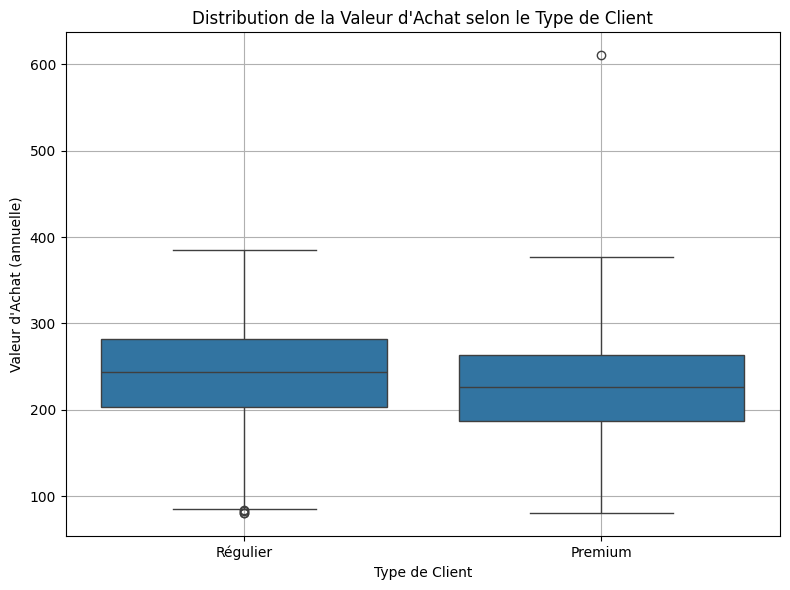

In [119]:
# Boîte à moustaches pour visualiser la distribution de la ValeurAchat selon le TypeClient
plt.figure(figsize=(8, 6))
sns.boxplot(x="TypeClient", y="ValeurAchat", data=df)
plt.title("Distribution de la Valeur d'Achat selon le Type de Client")
plt.xlabel("Type de Client")
plt.ylabel("Valeur d'Achat (annuelle)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
# Moyennes par groupe
mean_by_group = df.groupby("TypeClient")["ValeurAchat"].mean()

# Test t de Student pour échantillons indépendants
regular = df[df["TypeClient"] == "Régulier"]["ValeurAchat"]
premium = df[df["TypeClient"] == "Premium"]["ValeurAchat"]
t_stat, p_value = stats.ttest_ind(regular, premium, equal_var=False);

mean_by_group, t_stat, p_value

(TypeClient
 Premium     225.345762
 Régulier    242.541445
 Name: ValeurAchat, dtype: float64,
 np.float64(6.754996376021365),
 np.float64(1.8681602198802195e-11))

### 9.	Donnez les corrélations entre toutes les variables. Quelles conclusions en tirez-vous ?	(1 point)

In [121]:
# Matrice de corrélation des variables quantitatives
correlation_matrix = df_quantitative.corr()
correlation_matrix

,Age,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
Age,1.000000,0.001680,0.028580,0.009367,0.021727,0.024218,0.030630,-0.005973,-0.011584,0.013313,0.002859
NbAchats,0.001680,1.000000,-0.004184,-0.027561,0.028041,0.005712,-0.020714,-0.456566,0.333760,0.573000,-0.001961
Revenu,0.028580,-0.004184,1.000000,0.023546,0.003626,-0.025273,-0.026932,-0.055210,0.048401,0.064924,0.023107
TempsSite,0.009367,-0.027561,0.023546,1.000000,-0.013156,0.004700,-0.000160,-0.001395,0.020789,-0.006508,-0.002873
Réduction,0.021727,0.028041,0.003626,-0.013156,1.000000,-0.009117,-0.009725,0.083702,-0.062031,-0.114601,-0.015774
PanierMoyen,0.024218,0.005712,-0.025273,0.004700,-0.009117,1.000000,0.914214,-0.309794,0.269281,0.415477,-0.038237
TotalAchats,0.030630,-0.020714,-0.026932,-0.000160,-0.009725,0.914214,1.000000,-0.275214,0.243348,0.362250,-0.021903
AppelSerClient,-0.005973,-0.456566,-0.055210,-0.001395,0.083702,-0.309794,-0.275214,1.000000,-0.445629,-0.794614,0.095302
NbVisites,-0.011584,0.333760,0.048401,0.020789,-0.062031,0.269281,0.243348,-0.445629,1.000000,0.570928,-0.047036
ValeurAchat,0.013313,0.573000,0.064924,-0.006508,-0.114601,0.415477,0.362250,-0.794614,0.570928,1.000000,-0.115557


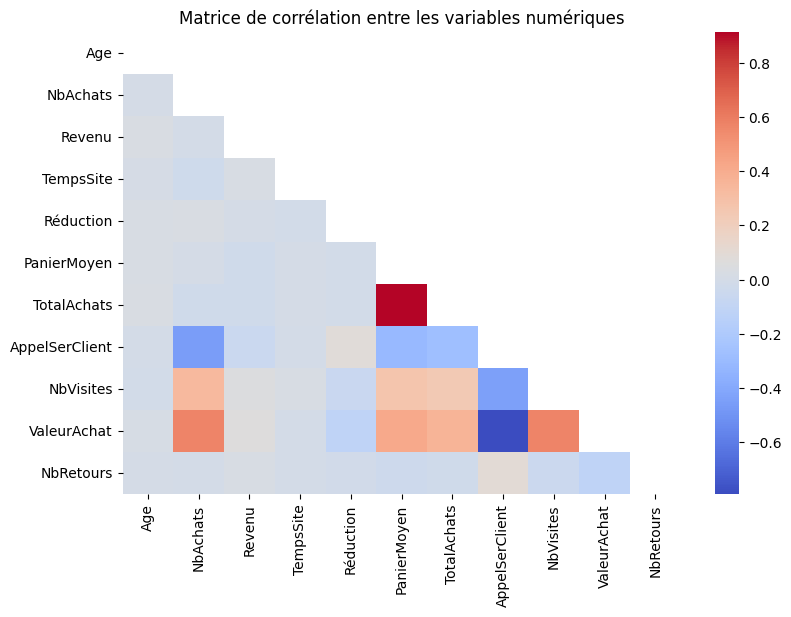

In [122]:
plt.figure(figsize=(9,6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,mask=mask, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

### 10.	Régression linéaire 	

####    a)	Exécutez une régression linéaire pour estimer la valeur d’achat par an (ValeurAchat) d’un client. Fournissez le tableau résumant les résultats.	(3 points)

Traiter les valeurs négatifs pour la `AppelSerClient`

In [123]:
df['AppelSerClient'] = df['AppelSerClient'].apply(lambda x: 0 if x < 0 else x)
df 

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
1,47,Régulier,Virement,30,4180.13,13.70,23.31,112.52,463.08,3,7.42,296.70,2
2,31,Premium,Carte,38,3996.57,10.37,12.11,125.58,542.33,7,7.92,316.77,5
3,39,Régulier,PayPal,15,2228.23,14.64,23.31,139.70,581.82,9,9.78,271.29,0
4,43,Régulier,Carte,6,4053.89,23.95,4.99,95.85,377.39,11,9.22,208.64,0
5,36,Premium,Virement,27,2991.89,8.33,18.79,110.71,443.85,7,7.48,259.01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,35,Régulier,PayPal,20,3387.37,7.13,5.99,82.39,326.57,9,9.63,225.31,2
1997,61,Régulier,PayPal,6,1577.03,17.59,11.49,122.26,475.06,9,6.84,193.70,3
1998,46,Régulier,Virement,36,3742.46,16.59,26.80,103.43,384.70,3,8.05,281.97,3


In [124]:
df[df["AppelSerClient"] == 0] 

,Age,TypeClient,ModePayement,NbAchats,Revenu,TempsSite,Réduction,PanierMoyen,TotalAchats,AppelSerClient,NbVisites,ValeurAchat,NbRetours
ID,,,,,,,,,,,,,
33,58,Régulier,Virement,42,1908.37,5.06,9.59,105.00,440.01,0,7.36,294.43,2
47,66,Premium,Virement,41,3872.20,11.25,28.63,85.19,295.77,0,11.33,293.01,5
49,45,Régulier,Carte,48,3458.17,4.97,12.07,102.73,436.93,0,13.02,361.00,1
91,55,Régulier,Carte,45,1892.84,23.30,10.57,130.74,550.97,0,12.91,356.56,2
104,32,Régulier,Virement,36,2391.65,9.37,21.15,98.76,449.02,0,9.36,294.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,40,Régulier,Carte,46,5511.56,8.04,5.96,139.89,599.55,0,12.43,377.31,2
1939,31,Régulier,PayPal,42,4097.30,17.55,13.81,113.28,458.12,0,10.19,327.45,1
1965,38,Régulier,Carte,27,2064.40,14.57,18.05,103.32,446.28,0,9.48,299.26,3


Traiter les variables catégorielles

In [125]:
# Encodage binaire de TypeClient : Premium = 1, Régulier = 0
df['TypeClient'] = df['TypeClient'].map({'Régulier': 0, 'Premium': 1})

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['ModePayement'], drop_first=True, dtype=int)

# Liste des variables explicatives
variables_explicatives = [
    'Age', 'TypeClient', 'NbAchats', 'Revenu', 'TempsSite',
    'Réduction', 'PanierMoyen', 'TotalAchats', 'AppelSerClient',
    'NbVisites', 'NbRetours',
    'ModePayement_PayPal', 'ModePayement_Virement']

Régression

In [126]:
# Définir X et y
X = df[variables_explicatives]
y = df['ValeurAchat']

# Ajouter la constante (intercept)
X = sm.add_constant(X)

# Régression linéaire
model = sm.OLS(y, X)
result = model.fit()

# Résumé du modèle
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            ValeurAchat   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     499.6
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:40:50   Log-Likelihood:                -9490.5
No. Observations:                2000   AIC:                         1.901e+04
Df Residuals:                    1986   BIC:                         1.909e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   166.35

#### b)	Évaluez la performance du modèle en discutant son ajustement aux données.	(1 point)

> Le modèle de régression linéaire estimant la valeur d’achat annuelle (`ValeurAchat`) présente un R² de 0,766, indiquant que 76,6 % de la variabilité de la valeur d’achat est expliquée par les variables indépendantes incluses dans le modèle. Cela représente un très bon niveau d’ajustement, surtout dans un contexte commercial réel où les comportements d'achat sont souvent influencés par des facteurs complexes et partiellement observables. Le R² ajusté, qui pénalise les variables non pertinentes, est de 0,764, ce qui est très proche du R² simple, confirmant que la majorité des variables intégrées sont utiles et contribuent à la qualité du modèle. La statistique F est très élevée (499,6) avec une p-value quasi nulle, ce qui indique que le modèle est globalement significatif : l’ensemble des variables explicatives contribue de manière significative à la prédiction de la variable cible.
En somme, le modèle présente une performance satisfaisante et constitue un outil pertinent pour expliquer et anticiper la valeur d’achat annuelle des clients.

#### c)	Quelles sont les variables significatives pour prédire la valeur d'achat ?	(1 point)

> Parmi les variables incluses dans le modèle, plusieurs se sont révélées statistiquement significatives au seuil de 5 %. Il s’agit notamment du type de client (`TypeClient`), du nombre d’achats (`NbAchats`), du revenu (`Revenu`), de la réduction appliquée (`Réduction`), du panier moyen (`PanierMoyen`), du nombre d’appels au service à la clientèle (`AppelSerClient`) et du nombre de visites (`NbVisites`). Ces variables ont un effet significatif sur la valeur d’achat annuelle, avec des impacts positifs ou négatifs selon leur nature. En revanche, d’autres variables comme l’âge, le temps passé sur le site, ou le mode de paiement ne sont pas significatives dans ce modèle et pourraient être écartées dans une version plus épurée.

#### d)	Diagnostiquez le modèle en indiquant les hypothèses violées.	(2 points)

> Plusieurs hypothèses du modèle de régression linéaire sont respectées, notamment l’indépendance des erreurs, validée par une statistique de Durbin-Watson proche de 2 (1.981). Toutefois, certaines hypothèses sont violées. D’une part, la normalité des résidus est rejetée (test de Jarque-Bera très significatif, skewness et kurtosis éloignés des normes). D’autre part, le condition number élevé (≈ 31400) suggère une possible multicolinéarité entre certaines variables explicatives. Enfin, une hétéroscédasticité pourrait être présente, ce qui mérite un diagnostic visuel à travers un graphe des résidus. Ces éléments appellent à la prudence dans l’interprétation des coefficients et pourraient être corrigés dans une approche plus robuste (ex. : régression avec erreurs robustes).

In [127]:
# Obtenir les valeurs ajustées et les résidus
Val_ajustées = result.fittedvalues
résidus = result.resid

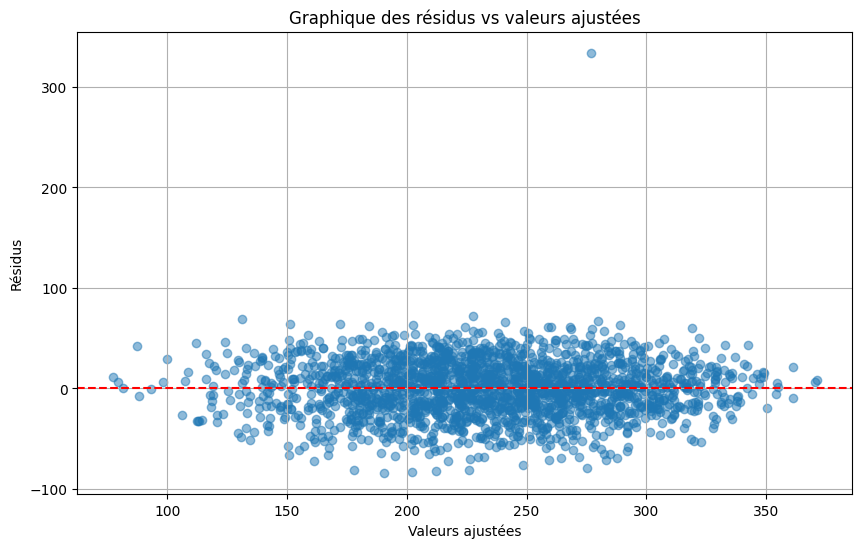

In [128]:
# Tracer les résidus vs valeurs ajustées
plt.figure(figsize=(10, 6))
plt.scatter(Val_ajustées, résidus, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.title("Graphique des résidus vs valeurs ajustées")
plt.grid(True)
plt.show()

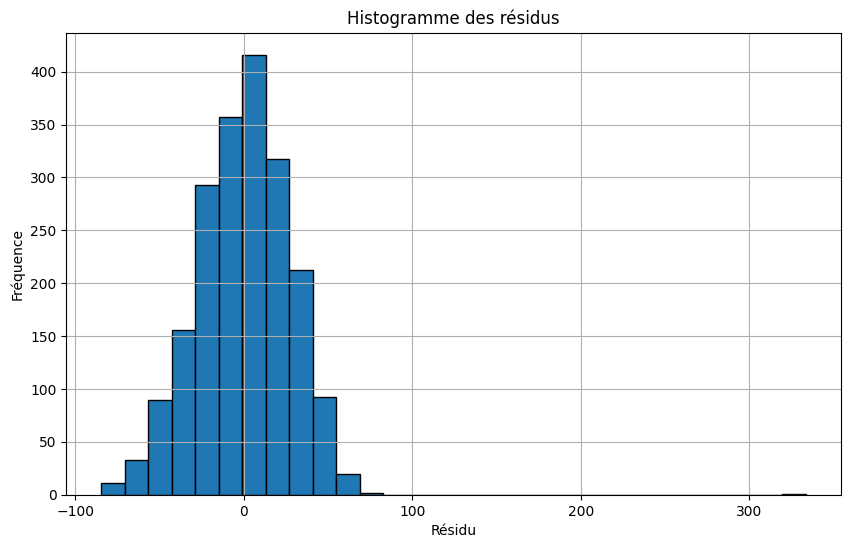

In [129]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(résidus, bins=30, edgecolor='black')
plt.title("Histogramme des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

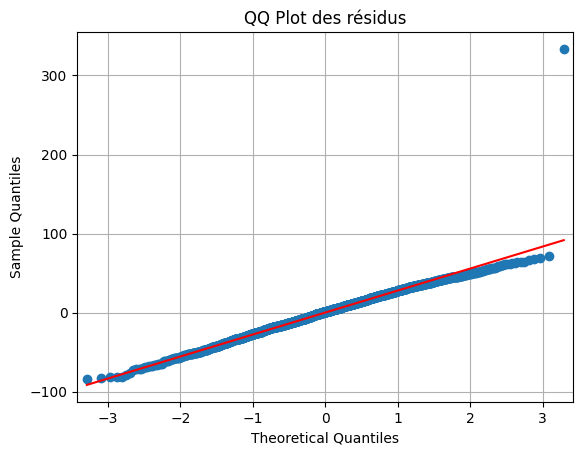

In [130]:
# Tracer un QQ plot des résidus
sm.qqplot(résidus, line='s')
plt.title("QQ Plot des résidus")
plt.grid(True)
plt.show()

> Les trois graphiques (résidus vs valeurs ajustées, histogramme, QQ plot) révèlent des violations importantes des hypothèses de normalité et d’homoscédasticité. Les résidus sont asymétriques et leur variance n’est pas constante, suggérant la présence d’erreurs hétéroscédastiques. Ces résultats appellent à la prudence dans l’interprétation des coefficients et justifieraient l’usage de modèles robustes.

#### e)	Expliquez l’impact du nombre d’appels aux services à la clientèle sur la valeur d’achat.	(1 point)

> Le nombre d’appels au service à la clientèle présente un coefficient négatif significatif dans le modèle de régression linéaire. Plus précisément, chaque appel supplémentaire est associé à une baisse moyenne de ***6,07 $*** de la valeur d’achat annuelle d’un client, toutes choses égales par ailleurs. Cette relation est fortement significative ``(p-value < 0,001)``, ce qui indique une influence robuste et non aléatoire. Elle peut être interprétée comme le signe d’un mécontentement ou d’un désengagement : les clients ayant recours au service à la clientèle rencontrent probablement des problèmes ou insatisfactions qui influencent négativement leurs comportements d’achat futurs.

> Cependant, il est important de nuancer cette conclusion. En effet, la variable ``AppelSerClient`` contenait initialement des valeurs négatives aberrantes, que nous avons remplacées par **0**. Ce traitement a pu introduire une sous-estimation artificielle du nombre réel d’appels pour certains clients, fusionnant les cas corrigés avec ceux n’ayant jamais contacté le service. Ainsi, bien que l’effet négatif soit clair et statistiquement solide, son amplitude exacte doit être interprétée avec prudence. Cela renforce la nécessité de vérifier la qualité des données avant toute prise de décision stratégique fondée sur les résultats du modèle.

### 11.	Compte tenu des résultats obtenus dans l’analyse de la régression linéaire, quelles sont les trois principales recommandations que vous pouvez formuler pour augmenter la valeur d'achat des clients ?

L’analyse de régression a permis d’identifier trois leviers essentiels pour augmenter la valeur d’achat annuelle des clients :

- Cibler les clients à revenu élevé : Les clients avec un revenu mensuel plus important dépensent davantage. L’entreprise devrait adapter ses offres et campagnes marketing pour attirer cette clientèle, en valorisant des produits haut de gamme et des avantages personnalisés.

- Optimiser les réductions : Les promotions influencent positivement la valeur d’achat, mais doivent être ciblées et mesurées. Des réductions personnalisées (fidélité, relance après inactivité, etc.) sont préférables à des rabais généralisés. L’analyse régulière des résultats est essentielle pour maintenir la rentabilité.

- Améliorer l’expérience client : Un nombre élevé d’appels au service client est associé à une baisse de la valeur d’achat, signe d’insatisfaction. Il est donc crucial de simplifier la navigation, clarifier les informations, améliorer le service après-vente et former le personnel pour renforcer la fidélité.

Ces recommandations visent à renforcer l’engagement des clients et à maximiser les revenus de façon durable.